## DATA PREPROCESSING & FEATURE ENGINEERING

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Load Data from excel file

# Dataset from Year 2009-2010
df1 = pd.read_excel("../data/raw/online_retail.xlsx",sheet_name=0)

# Dataset from Year 2010-2011 
df2 = pd.read_excel("../data/raw/online_retail.xlsx",sheet_name=1)

In [4]:
# Merged Both Datasets

df = pd.concat([df1,df2],ignore_index=True)

In [18]:
cleaned_df = df.copy()

In [19]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [20]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]

In [21]:
# Dropping Null Customer ID rows as they don't have any impact anyway.

cleaned_df.dropna(subset=["Customer ID"], inplace=True)

C:\Users\Dell Precision\AppData\Local\Temp\ipykernel_13092\800142717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace=True)


In [22]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,802711.000000,802711,802711.000000,802711.000000
mean,13.336280,2011-01-02 09:20:34.073732864,2.930474,15338.065410
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-07-07 11:53:00,1.250000,13988.000000
50%,5.000000,2010-12-03 14:54:00,1.950000,15276.000000
75%,12.000000,2011-07-28 13:02:00,3.750000,16809.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,144.542222,NaN,4.275804,1693.929085


In [23]:
len(cleaned_df[cleaned_df["Price"] == 0])

62

All the orders that have ZERO price should be removed since they are not big in number so that wouldn't be a problem also

In [24]:
cleaned_df.shape

(802711, 8)

In [25]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0]
cleaned_df.shape

(802649, 8)

In [26]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,802649.000000,802649,802649.000000,802649.000000
mean,13.318950,2011-01-02 09:19:54.210121984,2.930701,15338.153000
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-07-07 11:53:00,1.250000,13988.000000
50%,5.000000,2010-12-03 14:54:00,1.950000,15276.000000
75%,12.000000,2011-07-28 13:02:00,3.750000,16809.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,143.867456,NaN,4.275891,1693.901255


Amount of Data Lost in the Cleaning step

In [27]:
len(cleaned_df)/len(df)*100

75.19868911559337

Dropped about 25% of the Data

## Feature Engineering

In [28]:
cleaned_df["Sales"] = cleaned_df["Quantity"] * cleaned_df["Price"]
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [29]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue=("Sales", "sum"),
        Frequency=("Invoice", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,77352.96,3,2011-01-18 10:01:00
1,12347.0,5633.32,8,2011-12-07 15:52:00
2,12348.0,1658.40,5,2011-09-25 13:13:00
3,12349.0,3678.69,3,2011-11-21 09:51:00
4,12350.0,294.40,1,2011-02-02 16:01:00


In [30]:
max_invoice_date = aggregated_df['LastInvoiceDate'].max()
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,77352.96,3,2011-01-18 10:01:00,325
1,12347.0,5633.32,8,2011-12-07 15:52:00,1
2,12348.0,1658.40,5,2011-09-25 13:13:00,74
3,12349.0,3678.69,3,2011-11-21 09:51:00,18
4,12350.0,294.40,1,2011-02-02 16:01:00,309


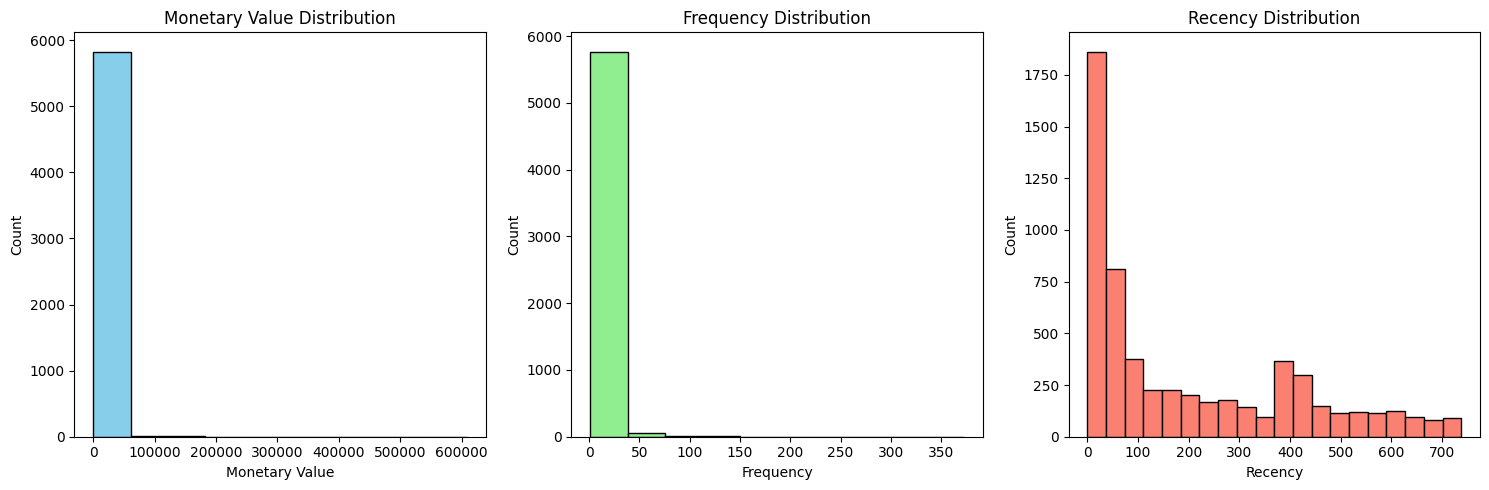

In [33]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

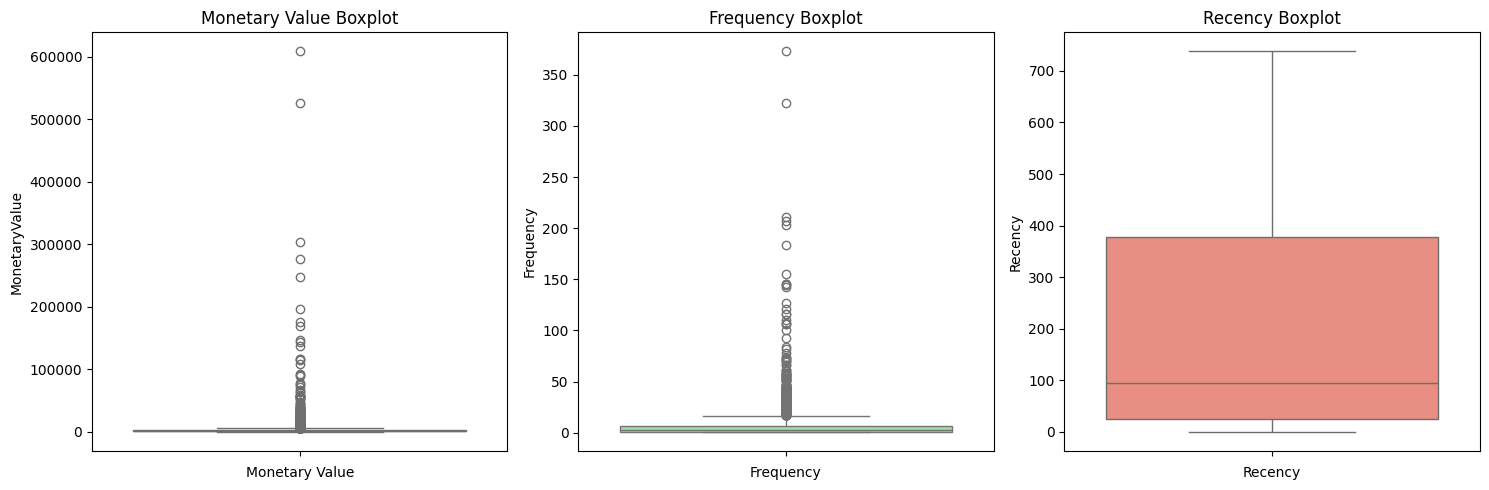

In [36]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [37]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,620.000000,620.000000,620.000000,620,620.000000
mean,15077.782258,18260.636545,25.983871,2011-10-19 01:33:52.548387072,50.983871
min,12346.000000,5217.440000,1.000000,2010-01-17 11:33:00,0.000000
25%,13573.000000,6591.865000,12.000000,2011-10-23 01:02:00,4.000000
50%,14924.000000,9131.805000,18.000000,2011-11-23 12:34:30,16.000000
75%,16607.500000,14486.350000,29.000000,2011-12-05 10:27:30,47.250000
max,18260.000000,608821.650000,373.000000,2011-12-09 12:49:00,691.000000
std,1754.422990,41750.244214,31.132004,NaN,102.874077


In [38]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,424.000000,424.000000,424.000000,424,424.000000
mean,15373.747642,21143.851403,34.870283,2011-11-08 06:13:43.160377344,30.787736
min,12415.000000,1820.440000,17.000000,2010-05-12 16:51:00,0.000000
25%,13851.000000,6368.085000,20.000000,2011-11-15 04:14:45,2.750000
50%,15306.000000,9760.710000,25.000000,2011-11-30 11:27:30,9.000000
75%,16947.250000,16691.300000,35.000000,2011-12-06 12:59:15,24.000000
max,18283.000000,608821.650000,373.000000,2011-12-09 12:49:00,575.000000
std,1777.616900,49369.498858,34.677844,NaN,70.627095


In [39]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,5167.000000,5167.000000,5167.000000,5167,5167.000000
mean,15341.723437,1133.523987,3.689181,2011-05-04 02:42:25.140313600,218.895878
min,12348.000000,2.950000,1.000000,2009-12-01 10:49:00,0.000000
25%,13862.500000,311.030000,1.000000,2010-11-11 13:06:30,32.000000
50%,15355.000000,717.510000,3.000000,2011-07-28 14:08:00,133.000000
75%,16811.500000,1579.130000,5.000000,2011-11-06 13:22:30,392.000000
max,18287.000000,5202.970000,16.000000,2011-12-09 12:50:00,738.000000
std,1705.112291,1128.972117,3.194642,NaN,211.118300


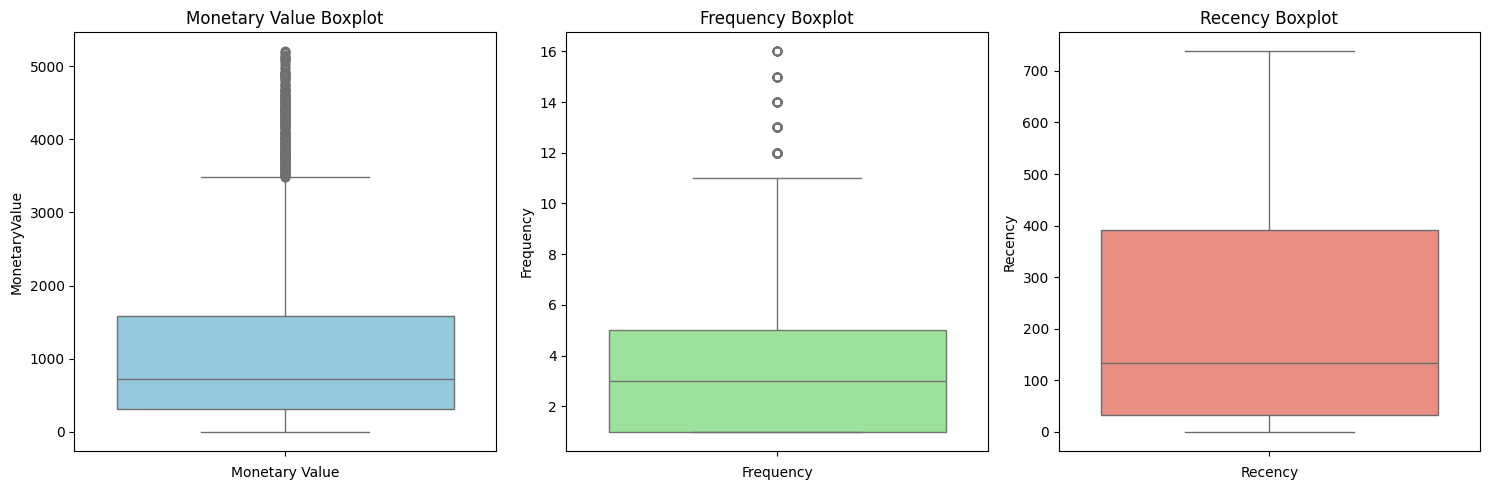

In [40]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

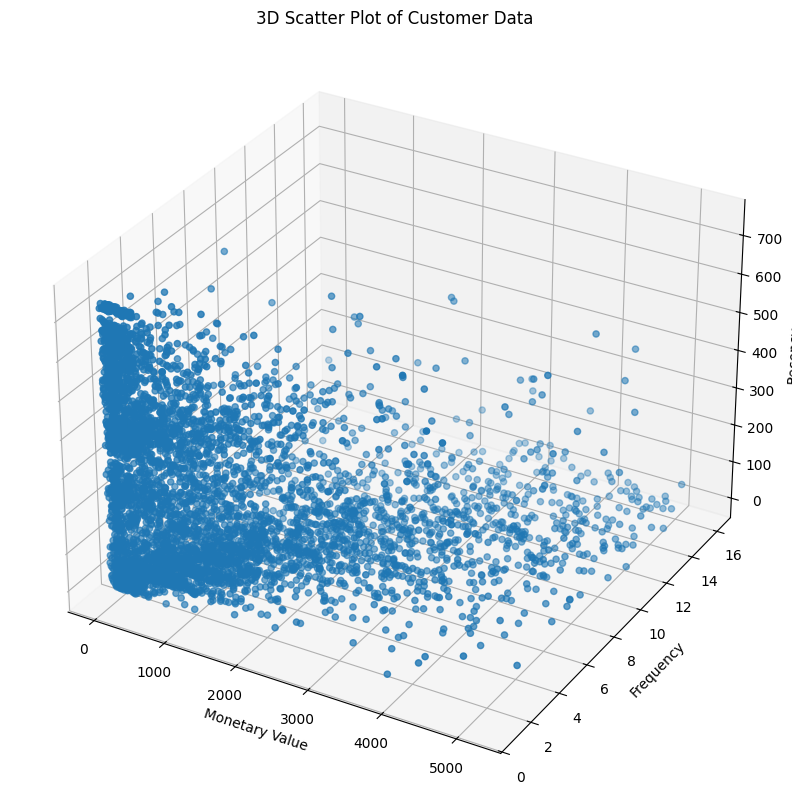

In [44]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

## Data Transformation

In [46]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[ 0.46495994,  0.41035762, -0.68639195],
       [ 2.25462817, -0.21575129, -0.95167175],
       [-0.74333563, -0.84186021,  0.42683577],
       ...,
       [-0.67016465, -0.84186021,  2.08957165],
       [ 0.10001748, -0.52880575,  1.21793803],
       [ 2.65706855,  1.03646654, -0.8379804 ]])